# Wstęp

Temat projektu: "Zadanie klasyfikacji na przykładzie określania zdolności kredytowej klienta banku"

Zbiór danych: "German Credit Data" - Dr. Hans Hoffman

Wykorzystane algorytmy: <br>
  - MLP - Multi Line Perceptron, <br>
  - SVC - Support Vector Classification, <br>
  - Logical Regression. <br>
    
Działanie każdego z algorytmów zostało zoptymalizowane poprzez wykorzystanie metody GridSearch.

# Wczytywanie danych

In [35]:
# Read csv file

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib as plt

file_data = pd.read_csv('credit_data.csv')

# Drops unnecessary first column containing original row numbers
credit_data = file_data.drop('Unnamed: 0', axis=1)

# Forma wczytanych danych

Zbiór danych German Credit Data posiada znacznie więcej cech.
Wybrano kilka najbardziej istotnych takich jak:<br>
  - wiek,<br>
  - płeć,<br>
  - forma zatrudnienia,<br>
  - miejsce zamieszkania,<br>
  - oszczędnosci,<br>
  - stan rachunku bieżącego,<br>
  - wartość kredytu,<br>
  - czas spłaty(w miesiącach),<br>
  - ryzyko kredytowe.

In [36]:
# Shows first five rows of data from file
credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Wizualizacja danych

## Zdolności kredytowe klientów

In [37]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = credit_data[credit_data["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = credit_data[credit_data["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = credit_data[credit_data["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = credit_data[credit_data["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

Zbiór danych jest niezbalansowany.

## Rozkład zdolności kredytowych ze względu na wiek

In [38]:
df_good = credit_data.loc[credit_data["Risk"] == 'good']['Age'].values.tolist()
df_bad = credit_data.loc[credit_data["Risk"] == 'bad']['Age'].values.tolist()
df_age = credit_data['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

c:\users\mbagnsk\desktop\pendrive\studiapendrive\magisterka1\iims\aum\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Zdolność kredytowa w zależności od wieku oraz kwoty

In [39]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
credit_data["Age_cat"] = pd.cut(credit_data.Age, interval, labels=cats)


df_good = credit_data[credit_data["Risk"] == 'good']
df_bad = credit_data[credit_data["Risk"] == 'bad']

In [40]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (DE Marks)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

## Zdolność kredytowa w zależności od posiadania nieruchomości

In [41]:
trace0 = go.Bar(
    x = credit_data[credit_data["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = credit_data[credit_data["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = credit_data[credit_data["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = credit_data[credit_data["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

In [42]:
df_good = credit_data[credit_data["Risk"] == 'good']
df_bad = credit_data[credit_data["Risk"] == 'bad']

In [43]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Housing'],
            "y": df_good['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Housing'],
            "y": df_bad['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

## Zdolność kredytowa w zależności od zatrudnienia i umiejętności

In [44]:
#First plot
trace0 = go.Bar(
    x = credit_data[credit_data["Risk"]== 'good']["Job"].value_counts().index.values,
    y = credit_data[credit_data["Risk"]== 'good']["Job"].value_counts().values,
    name='Good credit Distribuition'
)

#Second plot
trace1 = go.Bar(
    x = credit_data[credit_data["Risk"]== 'bad']["Job"].value_counts().index.values,
    y = credit_data[credit_data["Risk"]== 'bad']["Job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

Legenda:
  - 0: unskilled and non-resident,<br>
  - 1: unskilled and resident,<br>
  - 2: skilled,<br>
  - 3: highly skilled.<br>
  

In [45]:
trace0 = go.Box(
    x=df_good["Job"],
    y=df_good["Credit amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df_bad['Job'],
    y=df_bad['Credit amount'],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

Legenda:
  - 0: unskilled and non-resident,<br>
  - 1: unskilled and resident,<br>
  - 2: skilled,<br>
  - 3: highly skilled.<br>

## Zdolność kredytowa w zależności od posiadanych pieniędzy

In [46]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Saving accounts"].value_counts().index.values,
    y = df_good["Saving accounts"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_bad["Saving accounts"].value_counts().index.values,
    y = df_bad["Saving accounts"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Credit amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Credit amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Saving Accounts','Credit Amount by Savings Acc', 
                                          'Age by Saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

py.iplot(fig, filename='combined-savings')

c:\users\mbagnsk\desktop\pendrive\studiapendrive\magisterka1\iims\aum\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [47]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [48]:
credit_data['Saving accounts'] = credit_data['Saving accounts'].fillna('no_inf')
credit_data['Checking account'] = credit_data['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
credit_data = credit_data.merge(pd.get_dummies(credit_data.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
credit_data = credit_data.merge(pd.get_dummies(credit_data.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
credit_data = credit_data.merge(pd.get_dummies(credit_data.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
credit_data = credit_data.merge(pd.get_dummies(credit_data["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
credit_data = credit_data.merge(pd.get_dummies(credit_data.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
credit_data = credit_data.merge(pd.get_dummies(credit_data["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
credit_data = credit_data.merge(pd.get_dummies(credit_data["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [49]:
#Excluding the missing columns
del credit_data["Saving accounts"]
del credit_data["Checking account"]
del credit_data["Purpose"]
del credit_data["Sex"]
del credit_data["Housing"]
del credit_data["Age_cat"]
del credit_data["Risk"]
del credit_data['Risk_good']

## Heat map

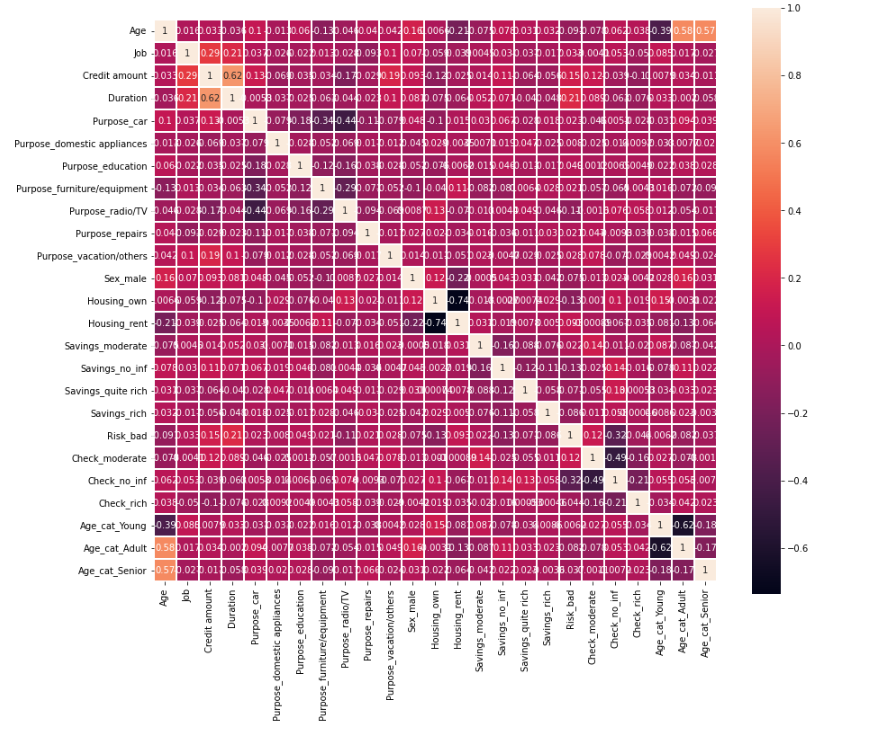